##1. 데이터 둘러보기

In [1]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (11.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and dir

In [15]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings #경고 메세지 무시하기
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-15-d06a161eba4f>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#데이터 불러오기
cc = pd.read_csv('/content/drive/MyDrive/data/2023 스터디 프로젝트 데이터/전화 해지 여부 분석/train.csv')

In [4]:
cc.head(10)

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
5,TRAIN_00005,82,32,89.5,83,28.9,289.6,29,32.28,270.7,323,2.26,2,0
6,TRAIN_00006,89,1,228.8,83,82.3,289.9,23,29.86,283.2,221,8.92,2,0
7,TRAIN_00007,290,1,223.9,99,31.0,294.2,203,26.82,290.1,209,22.66,0,0
8,TRAIN_00008,441,0,100.0,65,48.4,448.6,86,48.88,444.4,95,9.84,4,0
9,TRAIN_00009,223,0,63.2,223,21.2,23.4,89,6.88,228.6,100,2.29,2,1


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [6]:
cc.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [7]:
cc.describe(include = np.object_)

,ID
count,30200
unique,30200
top,TRAIN_00000
freq,1


In [12]:
cc['음성사서함이용'].unique()

array([   0,   80,   28,    1,   32,   30,   23,   24,   45,   22,   55,
         89,   81,   29,   33,   82,   42,   39,   21,   87,   43,   56,
         48,   83,   88,   26,   31,   40,   54,   90,   86,   84,   20,
         18,   34,   50,   49,   27,   44,   38,   41,   25,    3,   12,
          9,   47,   35,   46,   59,   37,    4,  211,   36,   57,   51,
        117,   16,   85,   17,   58,  111,  113,    2,   15,  112,    5,
         19,    8,   60,   14,   10,   13, 1111,  116,  212, 1112])

In [11]:
# 데이터 내용 간단히 정리
print("총 데이터 개수 : ", cc.shape[0] * cc.shape[1])
print("총 결측치 수 : {} = 전체 데이터의 : {:.2f}% ".format(cc.isnull().sum().sum(), (cc.isnull().sum().sum() * 100) / (cc.shape[0] * cc.shape[1])))

총 데이터 개수 :  422800
총 결측치 수 : 0 = 전체 데이터의 : 0.00% 


## 2. 전화 해지 여부의 비율은?

In [13]:
cc['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

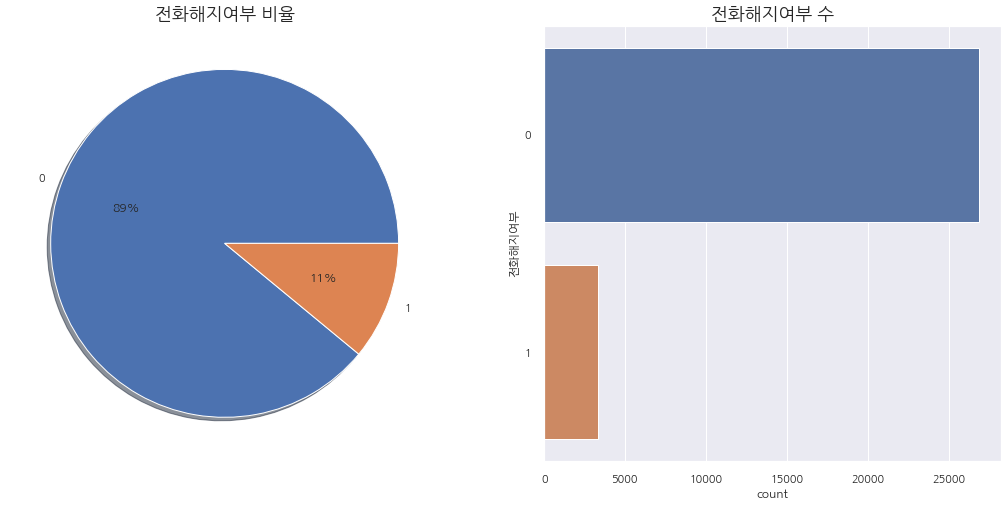

In [16]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

cc['전화해지여부'].value_counts().plot.pie(ax = ax[0], autopct = '%1.0f%%', shadow = True)
ax[0].set_title('전화해지여부 비율', size = 18)
ax[0].set_ylabel('')

sns.countplot(data = cc, y = '전화해지여부', ax = ax[1])
ax[1].set_title('전화해지여부 수', size = 18)

plt.show()